<a href="https://colab.research.google.com/github/yess-wee/DAUP/blob/main/exp3MLDL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('tennis.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
datas = '/content/tennis.csv'
data = pd.read_csv(datas, header = None)

data

,0,1,2,3,4
0,outlook,temp,humidity,windy,play
1,sunny,hot,high,false,no
2,sunny,hot,high,true,no
3,overcast,hot,high,false,yes
4,rainy,mild,high,false,yes
5,rainy,cool,normal,false,yes
6,rainy,cool,normal,true,no
7,overcast,cool,normal,true,yes
8,sunny,mild,high,false,no
9,sunny,cool,normal,false,yes


In [8]:
data.shape

(15, 5)

In [9]:
data.head()

,0,1,2,3,4
0,outlook,temp,humidity,windy,play
1,sunny,hot,high,false,no
2,sunny,hot,high,true,no
3,overcast,hot,high,false,yes
4,rainy,mild,high,false,yes


In [10]:
colname = ['outlook','temp','humidity','windy','play']

data.columns = colname

colname

['outlook', 'temp', 'humidity', 'windy', 'play']

In [11]:
data.tail(-1)

,outlook,temp,humidity,windy,play
1,sunny,hot,high,false,no
2,sunny,hot,high,true,no
3,overcast,hot,high,false,yes
4,rainy,mild,high,false,yes
5,rainy,cool,normal,false,yes
6,rainy,cool,normal,true,no
7,overcast,cool,normal,true,yes
8,sunny,mild,high,false,no
9,sunny,cool,normal,false,yes
10,rainy,mild,normal,false,yes


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   15 non-null     object
 1   temp      15 non-null     object
 2   humidity  15 non-null     object
 3   windy     15 non-null     object
 4   play      15 non-null     object
dtypes: object(5)
memory usage: 728.0+ bytes


In [13]:
for col in colname:
  print(data[col].value_counts())

outlook
sunny       5
rainy       5
overcast    4
outlook     1
Name: count, dtype: int64
temp
mild    6
hot     4
cool    4
temp    1
Name: count, dtype: int64
humidity
high        7
normal      7
humidity    1
Name: count, dtype: int64
windy
false    8
true     6
windy    1
Name: count, dtype: int64
play
yes     9
no      5
play    1
Name: count, dtype: int64


In [14]:
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
outlook=LabelEncoder ()
temp=LabelEncoder ()
humidity=LabelEncoder ()
windy=LabelEncoder ()
play=LabelEncoder ()

In [17]:
data['outlook']=outlook.fit_transform(data['outlook'])
data['temp']=outlook.fit_transform(data['temp'])
data['humidity']=outlook.fit_transform(data['humidity'])
data['windy']=outlook.fit_transform(data['windy'])
data['play']=outlook.fit_transform(data['play'])

In [18]:
features_cols=['outlook','temp','humidity','windy']
x=data[features_cols]
y=data.play

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
classifier=DecisionTreeClassifier(criterion='gini')

In [23]:
classifier.fit(x_train,y_train)
classifier.predict(x_test)

array([2, 0, 0])

In [24]:
x_test

,outlook,temp,humidity,windy
13,1,1,2,0
8,3,2,0,0
11,3,2,2,1


In [25]:
y_test

13    2
8     0
11    2
Name: play, dtype: int64

In [26]:
classifier.score(x_test,y_test)

0.6666666666666666

In [27]:
print('Training set score: {:.4f}'.format(classifier.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.6667


[Text(0.6, 0.9166666666666666, 'x[1] <= 2.5\ngini = 0.542\nsamples = 12\nvalue = [4, 1, 7]'),
 Text(0.4, 0.75, 'x[0] <= 1.5\ngini = 0.463\nsamples = 11\nvalue = [4, 0, 7]'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6, 0.5833333333333334, 'x[3] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 0, 4]'),
 Text(0.4, 0.4166666666666667, 'x[0] <= 2.5\ngini = 0.32\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6, 0.25, 'x[2] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

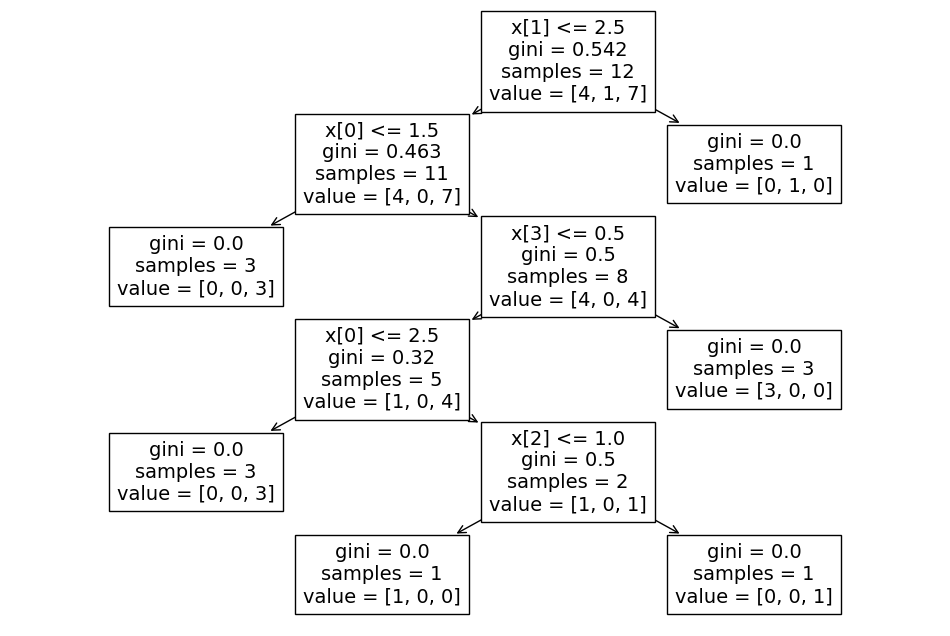

In [28]:
# from sklearn import tree
# tree.plot_tree(classifier)

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(x_train, y_train))

In [44]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
y_pred_en = clf_en.predict(x_test)


In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.3333


In [48]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0])

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9167


In [50]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.9167
Test set score: 0.3333


[Text(0.6, 0.875, 'x[1] <= 2.5\nentropy = 1.281\nsamples = 12\nvalue = [4, 1, 7]'),
 Text(0.4, 0.625, 'x[0] <= 1.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 0, 7]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6, 0.375, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 0, 4]'),
 Text(0.4, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

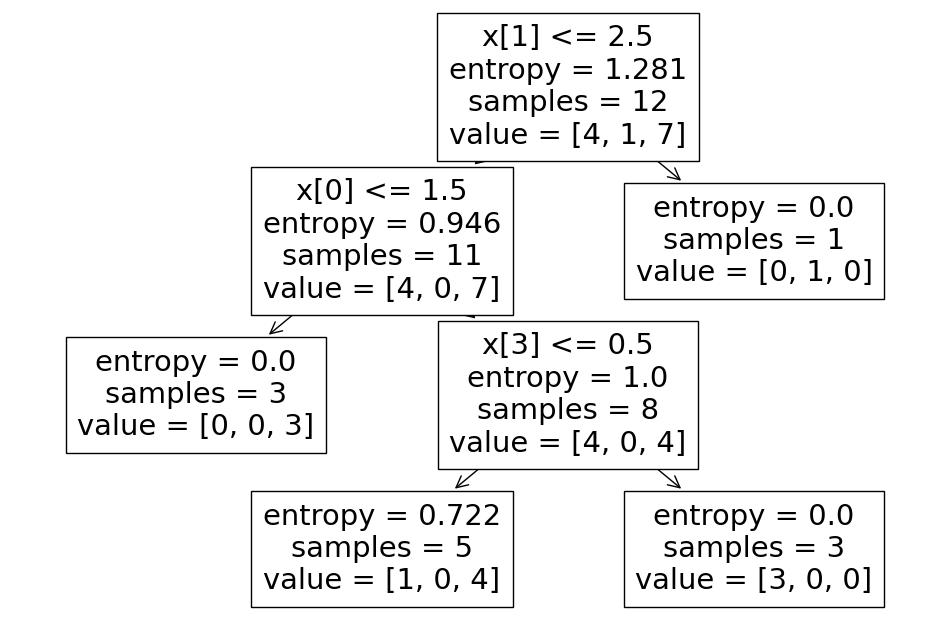

In [51]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           2       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

